# BI CAPSTONE PROJECT 2

## FEATURE SELECTION USING RFE, VIF and STATSMODEL P_Value

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [38]:
pd.set_option("max_columns",None)
pd.set_option("max_rows",None)

In [39]:
df=pd.read_csv("Leads.csv")
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [40]:
df.shape

(9240, 37)

In [41]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [42]:
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [43]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [44]:
#sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
df=df.drop(['Prospect ID','Lead Quality'],axis='columns')

In [46]:
#df=df.drop(['Tags','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Prospect ID'],axis='columns')

In [47]:
df['Tags']=df['Tags'].fillna(0)
df['Asymmetrique Activity Index']=df['Asymmetrique Activity Index'].fillna(0)
df['Asymmetrique Profile Index']=df['Asymmetrique Profile Index'].fillna(0)


In [48]:
df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [49]:
df['Lead Source']=df['Lead Source'].fillna(0)
df['Country']=df['Country'].fillna(0)
df['Last Activity']=df['Last Activity'].fillna(0)
df['Specialization']=df['Specialization'].fillna(0)
df['How did you hear about X Education']=df['How did you hear about X Education'].fillna(0)
df['What is your current occupation']=df['What is your current occupation'].fillna(0)
df['What matters most to you in choosing a course']=df['What matters most to you in choosing a course'].fillna(0)
df['Lead Profile']=df['Lead Profile'].fillna(0)
df['City']=df['City'].fillna(0)
df['Asymmetrique Activity Score']=df['Asymmetrique Activity Score'].fillna(0)
df['Asymmetrique Profile Score']=df['Asymmetrique Profile Score'].fillna(0)


In [50]:
df.isnull().sum()

Lead Number                                        0
Lead Origin                                        0
Lead Source                                        0
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                      0
Country                                            0
Specialization                                     0
How did you hear about X Education                 0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Magazine                                           0
Newspaper Article                                  0
X Education Forums                            

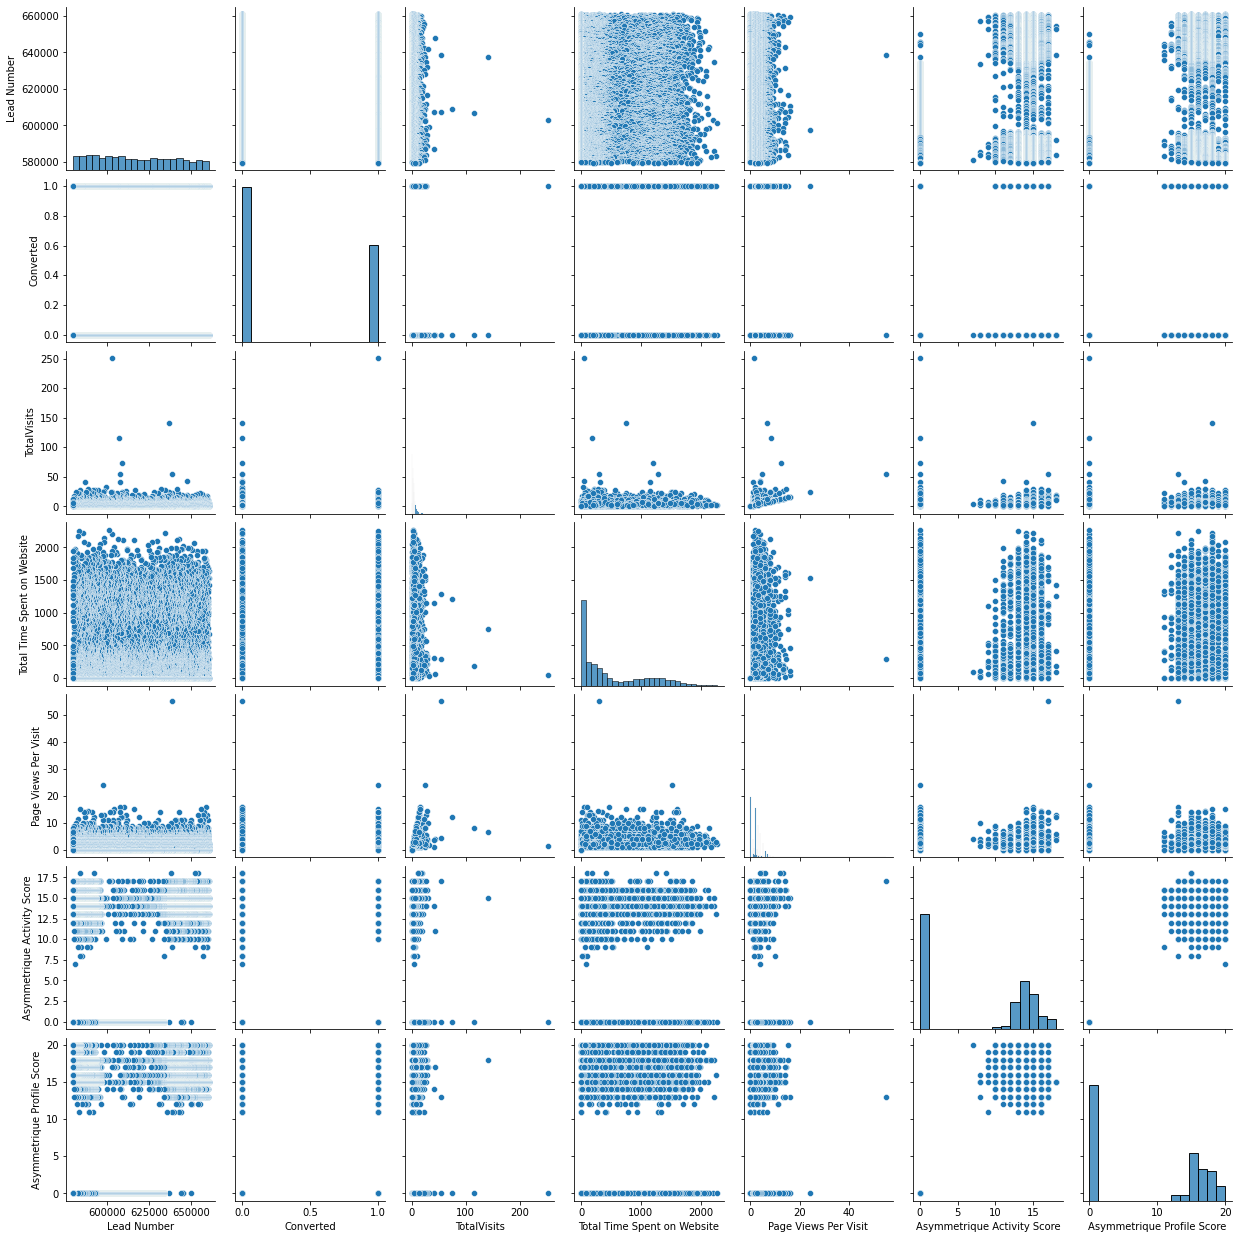

In [51]:
sns.pairplot(df)

In [52]:
df['TotalVisits']=df['TotalVisits'].fillna(df['TotalVisits'].mean())
df['Page Views Per Visit']=df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].mean())

In [53]:
df.set_index('Lead Number',inplace=True)

In [54]:
df.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

In [55]:
df.shape

(9240, 34)

## 2. Extract Features and Target variables

In [56]:
y=df['Converted']

In [57]:
X=df.drop('Converted',axis=True)

In [58]:
X.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,0,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 3. Fetures should be of Numeric in nature

In [59]:
df.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums             

In [60]:
#We have found several columns are not of numeric in nature, so using dummy encoding we aec resolving it

X=pd.get_dummies(X,drop_first=True)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EI

## 4. Features should have some rows and some columns

In [61]:
X.shape

(9240, 192)

## 5. Features shoulbe be of array/ dataframe

In [62]:
type(X)

pandas.core.frame.DataFrame

## 6. Split the dataset into Testing and Training  

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

## 7. Features should be of the same scale

In [65]:
X.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EI

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
scaler=MinMaxScaler()

In [68]:
X_train=scaler.fit_transform(X_train)

In [69]:
X_test=scaler.transform(X_test)

In [70]:
pd.DataFrame(X_train,columns=X.columns).describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EI

In [71]:
pd.DataFrame(X_test,columns=X.columns).describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EI

## 8. Train the model on the Training dataset

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression(solver='liblinear')

In [74]:
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [75]:
model.score(X_train,y_train)

0.9426406926406926

## 9. Test the model on Testing dataset

In [76]:
model.score(X_test,y_test) 

0.9383116883116883

In [77]:
#pd.DataFrame(X_train,columns=X.columns)

In [78]:
'''sns.heatmap(X_train.corr(),annot=True,linewidths=1)
plt.show()'''

'sns.heatmap(X_train.corr(),annot=True,linewidths=1)\nplt.show()'

## RFE

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix

In [80]:
rfe1=RFE(estimator=model,step=1)
rfe1=rfe1.fit(X_train,y_train)

In [81]:
X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [82]:
selected_rfe_features=pd.DataFrame({'Feature':list(X_train.columns),
                                   'Ranking':rfe1.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,TotalVisits,1
140,Tags_Lateral student,1
141,Tags_Lost to EINS,1
142,Tags_Lost to Others,1
143,Tags_Not doing further education,1
144,Tags_Recognition issue (DEC approval),1
145,Tags_Ringing,1
146,Tags_Shall take in the next coming month,1
74,Country_Saudi Arabia,1
72,Country_Qatar,1


The higher values mean that they were dropped at the early stage and the smaller values mean that they survive till the end and prove themselves fittest for the model. In a nutshell, columns with lower ranks are good for us.

In [83]:
X_train_rfe=rfe1.transform(X_train)
X_test_rfe=rfe1.transform(X_test)

In [84]:
X_train_rfe[0:3]

array([[0.01992032, 0.75022462, 0.01818182, 0.83333333, 0.75      ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [85]:
lr_rfe_model=model.fit(X_train_rfe,y_train)

In [86]:
def generate_accuracy_and_heatmap(mode,x,y):
    ac=accuracy_score(y,mode.predict(x))
    f_score=f1_score(y,mode.predict(x))
    print('Accuracy is:', ac)
    print('F1 score is:',f_score)
    print('\n')
    
    return

In [87]:
generate_accuracy_and_heatmap(lr_rfe_model,X_test_rfe,y_test)

Accuracy is: 0.9375901875901876
F1 score is: 0.9177365668093199




In [88]:
rfecv=RFECV(estimator=model,step=1,cv=5,scoring='accuracy')
rfecv=rfecv.fit(X_train,y_train)
print('Optimal number of Features :',rfecv.n_features_)
print('Best Features :',X_train.columns[rfecv.support_])

Optimal number of Features : 53
Best Features : Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_NC_EDM',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Country_Germany', 'Country_India',
       'Country_Qatar', 'Country_Saudi Arabia',
       'Specialization_Travel and Tourism',
       'How did you hear about X Education_Student of SomeSchool',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_In confusion whether part time or DLP',
       'Tags_Inte

In [89]:
rfecv.grid_scores_

array([0.7550967 , 0.86193521, 0.87863254, 0.88883681, 0.88636362,
       0.88605438, 0.88790981, 0.88899221, 0.89069248, 0.89378391,
       0.89486631, 0.89749501, 0.89780389, 0.89904073, 0.89888641,
       0.90012324, 0.90708117, 0.91682069, 0.92114823, 0.92671537,
       0.93197374, 0.93382953, 0.93367485, 0.93336525, 0.93305613,
       0.93413817, 0.93367425, 0.93398349, 0.93413769, 0.93429249,
       0.93429237, 0.93444693, 0.93475617, 0.93521984, 0.93552932,
       0.9350654 , 0.9350654 , 0.93568376, 0.9355292 , 0.93630272,
       0.9364574 , 0.93723091, 0.93800383, 0.93815839, 0.93862207,
       0.93846727, 0.93908539, 0.93877627, 0.93893095, 0.93877627,
       0.93862171, 0.93877639, 0.93923994, 0.93908539, 0.93908539,
       0.93908539, 0.93877627, 0.9390855 , 0.93893083, 0.93862159,
       0.93893107, 0.93815791, 0.93846715, 0.93784855, 0.93800311,
       0.93846715, 0.93831247, 0.93862183, 0.93846727, 0.93877651,
       0.93893107, 0.93893107, 0.93877639, 0.93877639, 0.93877

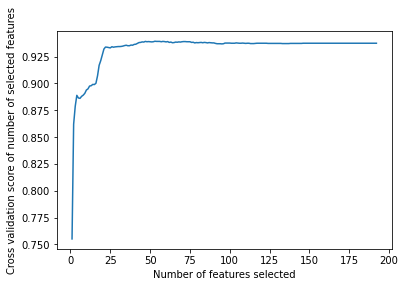

In [133]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

In [91]:
x_train_rfecv=rfecv.transform(X_train)
x_test_rfecv=rfecv.transform(X_test)

In [92]:
lr_rfecv_model=model.fit(x_train_rfecv,y_train)

In [93]:
generate_accuracy_and_heatmap(lr_rfecv_model,x_test_rfecv,y_test)

Accuracy is: 0.9375901875901876
F1 score is: 0.9177365668093199




### The optimal number of Features are: 53

### The optimal Features are:
'TotalVisits', 
'Total Time Spent on Website', 
'Page Views Per Visit',
       'Asymmetrique Activity Score', 
       'Asymmetrique Profile Score',
       'Lead Origin_Lead Import', 
       'Lead Source_Facebook', 'Lead Source_NC_EDM',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Country_Germany', 'Country_India',
       'Country_Qatar', 'Country_Saudi Arabia',
       'Specialization_Travel and Tourism',
       'How did you hear about X Education_Student of SomeSchool',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_In confusion whether part time or DLP',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Still Thinking',
       'Tags_Want to take admission but has financial problems',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Profile_Lateral Student',
       'Lead Profile_Potential Lead', 'Lead Profile_Student of SomeSchool',
       'City_Tier II Cities', 'Asymmetrique Activity Index_03.Low',
       'Asymmetrique Profile Index_01.High',
       'Asymmetrique Profile Index_02.Medium',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unsubscribed'

## VIF

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [96]:
def calculate_vif(dataset):
    vif=pd.DataFrame()
    vif["Features"]=dataset.columns
    vif["VIF_Value"]=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    vif = vif.sort_values(by='VIF_Value', ascending=True)
    return(vif)

In [97]:
X_sam=X
features=X_sam

In [98]:
calculate_vif(features)

,Features,VIF_Value
128,Newspaper_Yes,1.007498
140,Tags_Lateral student,1.008852
146,Tags_Shall take in the next coming month,1.008936
64,Country_Kenya,1.011387
79,Country_Switzerland,1.012547
31,Do Not Call_Yes,1.013528
136,Tags_In confusion whether part time or DLP,1.014660
56,Country_Denmark,1.015698
49,Country_Asia/Pacific Region,1.017061
66,Country_Liberia,1.017062


In [99]:
X_sam=X_sam.drop(['Last Notable Activity_Modified'],axis='columns')

In [100]:
features=X_sam
calculate_vif(features)

,Features,VIF_Value
128,Newspaper_Yes,1.007497
140,Tags_Lateral student,1.008848
146,Tags_Shall take in the next coming month,1.008919
64,Country_Kenya,1.011336
79,Country_Switzerland,1.012469
31,Do Not Call_Yes,1.013525
136,Tags_In confusion whether part time or DLP,1.014655
182,Last Notable Activity_Form Submitted on Website,1.015291
56,Country_Denmark,1.015665
49,Country_Asia/Pacific Region,1.016935


In [101]:
X_sam=X_sam.drop(['Asymmetrique Profile Score'],axis='columns')

In [102]:
features=X_sam
calculate_vif(features)

,Features,VIF_Value
127,Newspaper_Yes,1.007497
145,Tags_Shall take in the next coming month,1.008476
139,Tags_Lateral student,1.008848
63,Country_Kenya,1.011333
78,Country_Switzerland,1.012464
30,Do Not Call_Yes,1.013516
135,Tags_In confusion whether part time or DLP,1.014499
55,Country_Denmark,1.015279
181,Last Notable Activity_Form Submitted on Website,1.015289
65,Country_Liberia,1.016809


In [103]:
X_sam=X_sam.drop(['What is your current occupation_Unemployed'],axis='columns')

In [104]:
features=X_sam
calculate_vif(features)

,Features,VIF_Value
126,Newspaper_Yes,1.007469
144,Tags_Shall take in the next coming month,1.008475
138,Tags_Lateral student,1.008847
63,Country_Kenya,1.011325
78,Country_Switzerland,1.012462
30,Do Not Call_Yes,1.013489
134,Tags_In confusion whether part time or DLP,1.014498
180,Last Notable Activity_Form Submitted on Website,1.015270
55,Country_Denmark,1.015273
65,Country_Liberia,1.016722


In [105]:
X_sam=X_sam.drop(['Asymmetrique Activity Score'],axis='columns')

In [106]:
features=X_sam
calculate_vif(features)

,Features,VIF_Value
125,Newspaper_Yes,1.007459
143,Tags_Shall take in the next coming month,1.008422
137,Tags_Lateral student,1.008825
62,Country_Kenya,1.011322
77,Country_Switzerland,1.011928
29,Do Not Call_Yes,1.013485
145,Tags_University not recognized,1.013904
133,Tags_In confusion whether part time or DLP,1.014481
54,Country_Denmark,1.015206
179,Last Notable Activity_Form Submitted on Website,1.015218


In [107]:
X_sam=X_sam.drop(['City_Mumbai'],axis='columns')

In [109]:
features=X_sam
calculate_vif(features)

,Features,VIF_Value
125,Newspaper_Yes,1.007425
143,Tags_Shall take in the next coming month,1.008391
137,Tags_Lateral student,1.008819
62,Country_Kenya,1.011301
77,Country_Switzerland,1.011845
29,Do Not Call_Yes,1.013388
145,Tags_University not recognized,1.013904
133,Tags_In confusion whether part time or DLP,1.014481
54,Country_Denmark,1.015181
178,Last Notable Activity_Form Submitted on Website,1.015216


In [110]:
X_sam=X_sam.drop(['Lead Source_Google'],axis='columns')

In [111]:
features=X_sam
calculate_vif(features)

,Features,VIF_Value
14,Lead Source_Pay per Click Ads,1.005789
25,Lead Source_welearnblog_Home,1.006625
19,Lead Source_WeLearn,1.007009
22,Lead Source_blog,1.007238
124,Newspaper_Yes,1.007292
142,Tags_Shall take in the next coming month,1.008380
136,Tags_Lateral student,1.008796
21,Lead Source_bing,1.009497
61,Country_Kenya,1.009871
76,Country_Switzerland,1.010220


In [112]:
X_sam=X_sam.drop(['Country_India'],axis='columns')
features=X_sam
calculate_vif(features)

,Features,VIF_Value
46,Country_Asia/Pacific Region,1.003966
75,Country_Switzerland,1.005071
77,Country_Uganda,1.005474
64,Country_Netherlands,1.005480
52,Country_China,1.005526
60,Country_Kenya,1.005631
14,Lead Source_Pay per Click Ads,1.005786
25,Lead Source_welearnblog_Home,1.006609
19,Lead Source_WeLearn,1.006944
22,Lead Source_blog,1.007231


In [113]:
X_sam=X_sam.drop(['Lead Source_Facebook'],axis='columns')
features=X_sam
calculate_vif(features)

,Features,VIF_Value
45,Country_Asia/Pacific Region,1.003966
74,Country_Switzerland,1.005068
76,Country_Uganda,1.005472
63,Country_Netherlands,1.005480
51,Country_China,1.005525
59,Country_Kenya,1.005630
13,Lead Source_Pay per Click Ads,1.005785
24,Lead Source_welearnblog_Home,1.006605
18,Lead Source_WeLearn,1.006941
21,Lead Source_blog,1.007229


In [114]:

X_sam=X_sam.drop(['How did you hear about X Education_Select'],axis='columns')
features=X_sam
calculate_vif(features)

,Features,VIF_Value
45,Country_Asia/Pacific Region,1.003965
74,Country_Switzerland,1.004670
51,Country_China,1.005260
63,Country_Netherlands,1.005414
76,Country_Uganda,1.005461
59,Country_Kenya,1.005616
13,Lead Source_Pay per Click Ads,1.005671
24,Lead Source_welearnblog_Home,1.005684
21,Lead Source_blog,1.006845
18,Lead Source_WeLearn,1.006915


In [115]:
X_sam=X_sam.drop(['Lead Origin_Lead Add Form'],axis='columns')
features=X_sam
calculate_vif(features)

,Features,VIF_Value
44,Country_Asia/Pacific Region,1.003961
73,Country_Switzerland,1.004669
50,Country_China,1.005251
62,Country_Netherlands,1.005412
75,Country_Uganda,1.005455
58,Country_Kenya,1.005616
12,Lead Source_Pay per Click Ads,1.005670
23,Lead Source_welearnblog_Home,1.005684
20,Lead Source_blog,1.006845
17,Lead Source_WeLearn,1.006910


In [116]:
X_sam=X_sam.drop(['Lead Origin_Landing Page Submission'],axis='columns')
features=X_sam
calculate_vif(features)

,Features,VIF_Value
43,Country_Asia/Pacific Region,1.003932
72,Country_Switzerland,1.004659
61,Country_Netherlands,1.005037
16,Lead Source_WeLearn,1.005189
74,Country_Uganda,1.005238
49,Country_China,1.005251
57,Country_Kenya,1.005499
22,Lead Source_welearnblog_Home,1.005639
11,Lead Source_Pay per Click Ads,1.005663
19,Lead Source_blog,1.005977


In [117]:
X_sam=X_sam.drop(['Last Activity_Email Opened'],axis='columns')
features=X_sam
calculate_vif(features)

,Features,VIF_Value
42,Country_Asia/Pacific Region,1.003403
71,Country_Switzerland,1.004657
60,Country_Netherlands,1.005022
16,Lead Source_WeLearn,1.005188
73,Country_Uganda,1.005208
48,Country_China,1.005249
56,Country_Kenya,1.005485
22,Lead Source_welearnblog_Home,1.005627
11,Lead Source_Pay per Click Ads,1.005661
19,Lead Source_blog,1.005969


In [118]:
X_sam=X_sam.drop(['Specialization_Select'],axis='columns')
features=X_sam
calculate_vif(features)

,Features,VIF_Value
42,Country_Asia/Pacific Region,1.003285
71,Country_Switzerland,1.004531
48,Country_China,1.004949
60,Country_Netherlands,1.005006
16,Lead Source_WeLearn,1.005083
19,Lead Source_blog,1.005205
73,Country_Uganda,1.005208
56,Country_Kenya,1.005447
22,Lead Source_welearnblog_Home,1.005468
11,Lead Source_Pay per Click Ads,1.005609


In [119]:
X_sam=X_sam.drop(['Last Activity_SMS Sent'],axis='columns')
features=X_sam
calculate_vif(features)

,Features,VIF_Value
41,Country_Asia/Pacific Region,1.003132
70,Country_Switzerland,1.004523
47,Country_China,1.004947
59,Country_Netherlands,1.004995
16,Lead Source_WeLearn,1.005083
72,Country_Uganda,1.005190
19,Lead Source_blog,1.005204
55,Country_Kenya,1.005430
22,Lead Source_welearnblog_Home,1.005466
116,Newspaper_Yes,1.005565


In [120]:
X_sam=X_sam.drop(['Last Notable Activity_SMS Sent'],axis='columns')
features=X_sam
calculate_vif(features)

,Features,VIF_Value
41,Country_Asia/Pacific Region,1.002228
70,Country_Switzerland,1.004499
47,Country_China,1.004858
59,Country_Netherlands,1.004986
16,Lead Source_WeLearn,1.005083
19,Lead Source_blog,1.005142
72,Country_Uganda,1.005142
116,Newspaper_Yes,1.005333
55,Country_Kenya,1.005429
22,Lead Source_welearnblog_Home,1.005449


In [121]:
X_sam=X_sam.drop(['Tags_Will revert after reading the email'],axis='columns')
features=X_sam
calculate_vif(features)

,Features,VIF_Value
41,Country_Asia/Pacific Region,1.002224
128,Tags_Lateral student,1.003921
70,Country_Switzerland,1.004498
47,Country_China,1.004855
59,Country_Netherlands,1.004977
16,Lead Source_WeLearn,1.005049
72,Country_Uganda,1.005121
19,Lead Source_blog,1.005133
116,Newspaper_Yes,1.005332
55,Country_Kenya,1.005428


In [122]:
X_sam =X_sam[X_sam.columns.drop(list(X_sam.filter(regex='What matters most to you in choosing a course')))]
X_sam =X_sam[X_sam.columns.drop(list(X_sam.filter(regex='Asymmetrique Profile Index')))]
X_sam =X_sam[X_sam.columns.drop(list(X_sam.filter(regex='Asymmetrique Activity Index')))]
X_sam=X_sam.drop(['Last Activity_Resubscribed to emails','Last Notable Activity_Resubscribed to emails','Last Notable Activity_Email Marked Spam','Last Activity_Email Marked Spam'],axis='columns')
features=X_sam
calculate_vif(features)


,Features,VIF_Value
39,Country_Asia/Pacific Region,1.001989
7,Lead Source_Live Chat,1.002448
123,Tags_Lateral student,1.003578
68,Country_Switzerland,1.004238
16,Lead Source_WeLearn,1.004375
45,Country_China,1.004507
19,Lead Source_blog,1.004530
129,Tags_Shall take in the next coming month,1.004814
70,Country_Uganda,1.004879
57,Country_Netherlands,1.004930


In [123]:
X_sam=X_sam.drop(['Lead Profile_Select'],axis='columns')
features=X_sam
calculate_vif(features)

,Features,VIF_Value
7,Lead Source_Live Chat,1.001890
39,Country_Asia/Pacific Region,1.001959
123,Tags_Lateral student,1.003375
68,Country_Switzerland,1.003954
45,Country_China,1.004264
16,Lead Source_WeLearn,1.004281
129,Tags_Shall take in the next coming month,1.004408
19,Lead Source_blog,1.004410
111,Newspaper_Yes,1.004644
70,Country_Uganda,1.004879


 BY using VIF these are the Best Features, the best features are considered by calculating VIF_value. 
#### When the VIF_value is <5 the corresponding Feature is selected 

### These are the Best Feature Columns according VIF

.

## P-Value

In [124]:
import statsmodels.api as sm

In [125]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EI

In [126]:
y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [127]:
X_vars=X
y_var=y
XTrain,XTest,YTrain,YTest=train_test_split(X_vars,y_var,train_size=0.7,random_state=5)

In [128]:
X_vars.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Select,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EI

In [129]:
logmode=sm.OLS(y_var,X_vars).fit()

In [130]:
print(logmode.summary())

                                 OLS Regression Results                                
Dep. Variable:              Converted   R-squared (uncentered):                   0.858
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                              292.1
Date:                Fri, 26 Nov 2021   Prob (F-statistic):                        0.00
Time:                        22:26:27   Log-Likelihood:                          328.27
No. Observations:                9240   AIC:                                     -280.5
Df Residuals:                    9052   BIC:                                      1060.
Df Model:                         188                                                  
Covariance Type:            nonrobust                                                  
                                                                              coef    std err          t      P>|t|     

## Here P-value < 0.05 are considered as Optimal Features

We have successfully completed the goal i.e "USE FEATURE SELECTION TECHNIQUES LIKE RFE, VIF AND STATSMODELS TO FIND THE BEST FEATURES FOR THE TARGET COLUMN (“CONVERTED”)""